# Original

In [1]:
# import sys
# from os.path import join
# import torch
# import matplotlib.pyplot as plt
# sys.path.append("/n/holylabs/LABS/sompolinsky_lab/Everyone/xupan/DiffusionObjectRelation/PixArt-alpha")
# from diffusion.utils.misc import read_config, set_random_seed, \
#     init_random_seed, DebugUnderflowOverflow
# sys.path.append("/n/holylabs/LABS/sompolinsky_lab/Everyone/xupan/DiffusionObjectRelation")
# from utils.pixart_sampling_utils import visualize_prompts, load_embed_and_mask
# from utils.pixart_utils import construct_diffuser_pipeline_from_config, construct_pixart_transformer_from_config, state_dict_convert
# from utils.attention_map_store_utils import replace_attn_processor, AttnProcessor2_0_Store, PixArtAttentionVisualizer_Store

# # subclass a new pipeline from PixArtAlphaPipeline
# import os
# import torch
# from torch.autograd.functional import jacobian
# from typing import Callable, List, Optional, Tuple, Union, Dict, Any
# from diffusers.pipelines.pipeline_utils import DiffusionPipeline, ImagePipelineOutput
# from diffusers.pipelines.pixart_alpha.pipeline_pixart_alpha import retrieve_timesteps, PixArtAlphaPipeline
# # from diffusers.pipelines.pixart_alpha import EXAMPLE_DOC_STRING # Keep commented

# class PixArtAlphaPipeline_custom(PixArtAlphaPipeline):
    
#     # @replace_example_docstring(EXAMPLE_DOC_STRING)
#     @torch.no_grad()
#     def __call__(
#         self,
#         prompt: Union[str, List[str]] = None,
#         negative_prompt: str = "",
#         num_inference_steps: int = 20,
#         timesteps: List[int] = None,
#         sigmas: List[float] = None,
#         guidance_scale: float = 4.5,
#         num_images_per_prompt: Optional[int] = 1,
#         height: Optional[int] = None,
#         width: Optional[int] = None,
#         eta: float = 0.0,
#         generator: Optional[Union[torch.Generator, List[torch.Generator]]] = None,
#         latents: Optional[torch.Tensor] = None,
#         prompt_embeds: Optional[torch.Tensor] = None,
#         prompt_attention_mask: Optional[torch.Tensor] = None,
#         negative_prompt_embeds: Optional[torch.Tensor] = None,
#         negative_prompt_attention_mask: Optional[torch.Tensor] = None,
#         output_type: Optional[str] = "pil",
#         return_dict: bool = True,
#         callback: Optional[Callable[[int, int, torch.Tensor], None]] = None,
#         callback_steps: int = 1,
#         clean_caption: bool = True,
#         use_resolution_binning: bool = True,
#         max_sequence_length: int = 120,
#         return_sample_pred_traj: bool = False,
#         device: str = "cuda",
#         **kwargs,
#     ) -> Union[ImagePipelineOutput, Tuple]:
#         """
#         Function invoked when calling the pipeline for generation.

#         Args:
#             prompt (`str` or `List[str]`, *optional*):
#                 The prompt or prompts to guide the image generation. If not defined, one has to pass `prompt_embeds`.
#                 instead.
#             negative_prompt (`str` or `List[str]`, *optional*):
#                 The prompt or prompts not to guide the image generation. If not defined, one has to pass
#                 `negative_prompt_embeds` instead. Ignored when not using guidance (i.e., ignored if `guidance_scale` is
#                 less than `1`).
#             num_inference_steps (`int`, *optional*, defaults to 100):
#                 The number of denoising steps. More denoising steps usually lead to a higher quality image at the
#                 expense of slower inference.
#             timesteps (`List[int]`, *optional*):
#                 Custom timesteps to use for the denoising process with schedulers which support a `timesteps` argument
#                 in their `set_timesteps` method. If not defined, the default behavior when `num_inference_steps` is
#                 passed will be used. Must be in descending order.
#             sigmas (`List[float]`, *optional*):
#                 Custom sigmas to use for the denoising process with schedulers which support a `sigmas` argument in
#                 their `set_timesteps` method. If not defined, the default behavior when `num_inference_steps` is passed
#                 will be used.
#             guidance_scale (`float`, *optional*, defaults to 4.5):
#                 Guidance scale as defined in [Classifier-Free Diffusion Guidance](https://arxiv.org/abs/2207.12598).
#                 `guidance_scale` is defined as `w` of equation 2. of [Imagen
#                 Paper](https://arxiv.org/pdf/2205.11487.pdf). Guidance scale is enabled by setting `guidance_scale >
#                 1`. Higher guidance scale encourages to generate images that are closely linked to the text `prompt`,
#                 usually at the expense of lower image quality.
#             num_images_per_prompt (`int`, *optional*, defaults to 1):
#                 The number of images to generate per prompt.
#             height (`int`, *optional*, defaults to self.unet.config.sample_size):
#                 The height in pixels of the generated image.
#             width (`int`, *optional*, defaults to self.unet.config.sample_size):
#                 The width in pixels of the generated image.
#             eta (`float`, *optional*, defaults to 0.0):
#                 Corresponds to parameter eta (η) in the DDIM paper: https://arxiv.org/abs/2010.02502. Only applies to
#                 [`schedulers.DDIMScheduler`], will be ignored for others.
#             generator (`torch.Generator` or `List[torch.Generator]`, *optional*):
#                 One or a list of [torch generator(s)](https://pytorch.org/docs/stable/generated/torch.Generator.html)
#                 to make generation deterministic.
#             latents (`torch.Tensor`, *optional*):
#                 Pre-generated noisy latents, sampled from a Gaussian distribution, to be used as inputs for image
#                 generation. Can be used to tweak the same generation with different prompts. If not provided, a latents
#                 tensor will ge generated by sampling using the supplied random `generator`.
#             prompt_embeds (`torch.Tensor`, *optional*):
#                 Pre-generated text embeddings. Can be used to easily tweak text inputs, *e.g.* prompt weighting. If not
#                 provided, text embeddings will be generated from `prompt` input argument.
#             prompt_attention_mask (`torch.Tensor`, *optional*): Pre-generated attention mask for text embeddings.
#             negative_prompt_embeds (`torch.Tensor`, *optional*):
#                 Pre-generated negative text embeddings. For PixArt-Alpha this negative prompt should be "". If not
#                 provided, negative_prompt_embeds will be generated from `negative_prompt` input argument.
#             negative_prompt_attention_mask (`torch.Tensor`, *optional*):
#                 Pre-generated attention mask for negative text embeddings.
#             output_type (`str`, *optional*, defaults to `"pil"`):
#                 The output format of the generate image. Choose between
#                 [PIL](https://pillow.readthedocs.io/en/stable/): `PIL.Image.Image` or `np.array`.
#             return_dict (`bool`, *optional*, defaults to `True`):
#                 Whether or not to return a [`~pipelines.stable_diffusion.IFPipelineOutput`] instead of a plain tuple.
#             callback (`Callable`, *optional*):
#                 A function that will be called every `callback_steps` steps during inference. The function will be
#                 called with the following arguments: `callback(step: int, timestep: int, latents: torch.Tensor)`.
#             callback_steps (`int`, *optional*, defaults to 1):
#                 The frequency at which the `callback` function will be called. If not specified, the callback will be
#                 called at every step.
#             clean_caption (`bool`, *optional*, defaults to `True`):
#                 Whether or not to clean the caption before creating embeddings. Requires `beautifulsoup4` and `ftfy` to
#                 be installed. If the dependencies are not installed, the embeddings will be created from the raw
#                 prompt.
#             use_resolution_binning (`bool` defaults to `True`):
#                 If set to `True`, the requested height and width are first mapped to the closest resolutions using
#                 `ASPECT_RATIO_1024_BIN`. After the produced latents are decoded into images, they are resized back to
#                 the requested resolution. Useful for generating non-square images.
#             max_sequence_length (`int` defaults to 120): Maximum sequence length to use with the `prompt`.

#         Examples:

#         Returns:
#             [`~pipelines.ImagePipelineOutput`] or `tuple`:
#                 If `return_dict` is `True`, [`~pipelines.ImagePipelineOutput`] is returned, otherwise a `tuple` is
#                 returned where the first element is a list with the generated images
#         """
#         if "mask_feature" in kwargs:
#             deprecation_message = "The use of `mask_feature` is deprecated. It is no longer used in any computation and that doesn't affect the end results. It will be removed in a future version."
#             # deprecate("mask_feature", "1.0.0", deprecation_message, standard_warn=False)
#         # 1. Check inputs. Raise error if not correct
#         height = height or self.transformer.config.sample_size * self.vae_scale_factor
#         width = width or self.transformer.config.sample_size * self.vae_scale_factor
#         # if use_resolution_binning:
#         #     if self.transformer.config.sample_size == 128:
#         #         aspect_ratio_bin = ASPECT_RATIO_1024_BIN
#         #     elif self.transformer.config.sample_size == 64:
#         #         aspect_ratio_bin = ASPECT_RATIO_512_BIN
#         #     elif self.transformer.config.sample_size == 32:
#         #         aspect_ratio_bin = ASPECT_RATIO_256_BIN
#         #     else:
#         #         raise ValueError("Invalid sample size")
#         #     orig_height, orig_width = height, width
#         #     height, width = self.image_processor.classify_height_width_bin(height, width, ratios=aspect_ratio_bin)

#         self.check_inputs(
#             prompt,
#             height,
#             width,
#             negative_prompt,
#             callback_steps,
#             prompt_embeds,
#             negative_prompt_embeds,
#             prompt_attention_mask,
#             negative_prompt_attention_mask,
#         )

#         # 2. Default height and width to transformer
#         if prompt is not None and isinstance(prompt, str):
#             batch_size = 1
#         elif prompt is not None and isinstance(prompt, list):
#             batch_size = len(prompt)
#         else:
#             batch_size = prompt_embeds.shape[0]

#         device = self._execution_device

#         # here `guidance_scale` is defined analog to the guidance weight `w` of equation (2)
#         # of the Imagen paper: https://arxiv.org/pdf/2205.11487.pdf . `guidance_scale = 1`
#         # corresponds to doing no classifier free guidance.
#         do_classifier_free_guidance = guidance_scale > 1.0

#         # 3. Encode input prompt
#         (
#             prompt_embeds,
#             prompt_attention_mask,
#             negative_prompt_embeds,
#             negative_prompt_attention_mask,
#         ) = self.encode_prompt(
#             prompt,
#             do_classifier_free_guidance,
#             negative_prompt=negative_prompt,
#             num_images_per_prompt=num_images_per_prompt,
#             device=device,
#             prompt_embeds=prompt_embeds,
#             negative_prompt_embeds=negative_prompt_embeds,
#             prompt_attention_mask=prompt_attention_mask,
#             negative_prompt_attention_mask=negative_prompt_attention_mask,
#             clean_caption=clean_caption,
#             max_sequence_length=max_sequence_length,
#         )
#         if do_classifier_free_guidance:
#             prompt_embeds = torch.cat([negative_prompt_embeds, prompt_embeds], dim=0)
#             prompt_attention_mask = torch.cat([negative_prompt_attention_mask, prompt_attention_mask], dim=0)
#         print(prompt_embeds.shape)
#         print(prompt_attention_mask.shape)
#         # 4. Prepare timesteps
#         timesteps, num_inference_steps = retrieve_timesteps(
#             self.scheduler, num_inference_steps, device, timesteps, sigmas
#         )

#         # 5. Prepare latents.
#         latent_channels = self.transformer.config.in_channels
#         latents = self.prepare_latents(
#             batch_size * num_images_per_prompt,
#             latent_channels,
#             height,
#             width,
#             prompt_embeds.dtype,
#             device,
#             generator,
#             latents,
#         )

#         # 6. Prepare extra step kwargs. TODO: Logic should ideally just be moved out of the pipeline
#         extra_step_kwargs = self.prepare_extra_step_kwargs(generator, eta)

#         # 6.1 Prepare micro-conditions.
#         added_cond_kwargs = {"resolution": None, "aspect_ratio": None}
#         if self.transformer.config.sample_size == 128:
#             resolution = torch.tensor([height, width]).repeat(batch_size * num_images_per_prompt, 1)
#             aspect_ratio = torch.tensor([float(height / width)]).repeat(batch_size * num_images_per_prompt, 1)
#             resolution = resolution.to(dtype=prompt_embeds.dtype, device=device)
#             aspect_ratio = aspect_ratio.to(dtype=prompt_embeds.dtype, device=device)

#             if do_classifier_free_guidance:
#                 resolution = torch.cat([resolution, resolution], dim=0)
#                 aspect_ratio = torch.cat([aspect_ratio, aspect_ratio], dim=0)

#             added_cond_kwargs = {"resolution": resolution, "aspect_ratio": aspect_ratio}

#         # 7. Denoising loop
#         num_warmup_steps = max(len(timesteps) - num_inference_steps * self.scheduler.order, 0)

#         pred_traj = []
#         latents_traj = []
#         t_traj = []
#         with self.progress_bar(total=num_inference_steps) as progress_bar:
#             for i, t in enumerate(timesteps):
#                 latent_model_input = torch.cat([latents] * 2) if do_classifier_free_guidance else latents
#                 latent_model_input = self.scheduler.scale_model_input(latent_model_input, t)

#                 current_timestep = t
#                 if not torch.is_tensor(current_timestep):
#                     # TODO: this requires sync between CPU and GPU. So try to pass timesteps as tensors if you can
#                     # This would be a good case for the `match` statement (Python 3.10+)
#                     is_mps = latent_model_input.device.type == "mps"
#                     if isinstance(current_timestep, float):
#                         dtype = torch.float32 if is_mps else torch.float64
#                     else:
#                         dtype = torch.int32 if is_mps else torch.int64
#                     current_timestep = torch.tensor([current_timestep], dtype=dtype, device=latent_model_input.device)
#                 elif len(current_timestep.shape) == 0:
#                     current_timestep = current_timestep[None].to(latent_model_input.device)
#                 # broadcast to batch dimension in a way that's compatible with ONNX/Core ML
#                 current_timestep = current_timestep.expand(latent_model_input.shape[0])

#                 # predict noise model_output
#                 noise_pred = self.transformer(
#                     latent_model_input,
#                     encoder_hidden_states=prompt_embeds,
#                     encoder_attention_mask=prompt_attention_mask,
#                     timestep=current_timestep,
#                     added_cond_kwargs=added_cond_kwargs,
#                     return_dict=False,
#                 )[0]

#                 # perform guidance
#                 if do_classifier_free_guidance:
#                     noise_pred_uncond, noise_pred_text = noise_pred.chunk(2)
#                     noise_pred = noise_pred_uncond + guidance_scale * (noise_pred_text - noise_pred_uncond)

#                 # learned sigma
#                 if self.transformer.config.out_channels // 2 == latent_channels:
#                     noise_pred = noise_pred.chunk(2, dim=1)[0]
#                 else:
#                     noise_pred = noise_pred

#                 latents_traj.append(latents.cpu())
#                 pred_traj.append(noise_pred.cpu())
#                 # compute previous image: x_t -> x_t-1
#                 if num_inference_steps == 1:
#                     # For DMD one step sampling: https://arxiv.org/abs/2311.18828
#                     latents = self.scheduler.step(noise_pred, t, latents, **extra_step_kwargs).pred_original_sample
#                 else:
#                     latents = self.scheduler.step(noise_pred, t, latents, **extra_step_kwargs, return_dict=False)[0]
                
#                 # pred_traj.append(self.scheduler.step(noise_pred, t, latents, **extra_step_kwargs).pred_original_sample)
                
#                 t_traj.append(t)
#                 # call the callback, if provided
#                 if i == len(timesteps) - 1 or ((i + 1) > num_warmup_steps and (i + 1) % self.scheduler.order == 0):
#                     progress_bar.update()
#                     if callback is not None and i % callback_steps == 0:
#                         step_idx = i // getattr(self.scheduler, "order", 1)
#                         callback(step_idx, t, latents)

#         latents_traj.append(latents.cpu())
#         if not output_type == "latent":
#             image = self.vae.decode(latents / self.vae.config.scaling_factor, return_dict=False)[0]
#             # if use_resolution_binning:
#             #     image = self.image_processor.resize_and_crop_tensor(image, orig_width, orig_height)
#         else:
#             image = latents

#         if not output_type == "latent":
#             image = self.image_processor.postprocess(image.detach(), output_type=output_type)

#         # Offload all models
#         self.maybe_free_model_hooks()
#         latents_traj = torch.stack(latents_traj)
#         pred_traj = torch.stack(pred_traj)
#         # t_traj = torch.stack(t_traj)
#         if not return_dict:
#             return (image,)
#         if return_sample_pred_traj:
#             return ImagePipelineOutput(images=image), pred_traj, latents_traj, t_traj
#         return ImagePipelineOutput(images=image)
    
    
    
# def visualize_prompts_with_traj(pipeline, validation_prompts, prompt_cache_dir, max_length=120, weight_dtype=torch.float16,
#                    num_inference_steps=14, guidance_scale=4.5, num_images_per_prompt=25, device="cuda", random_seed=0):
#     # logger.info("Running validation... ")
#     # device = accelerator.device
#     # model = accelerator.unwrap_model(model)
#     if validation_prompts is None:
#         validation_prompts = [
#             "triangle is to the upper left of square", 
#             "blue triangle is to the upper left of red square", 
#             "triangle is above and to the right of square", 
#             "blue circle is above and to the right of blue square", 
#             "triangle is to the left of square", 
#             "triangle is to the left of triangle", 
#             "circle is below red square",
#             "red circle is to the left of blue square",
#             "blue square is to the right of red circle",
#             "red circle is above square",
#             "triangle is above red circle",
#             "red is above blue",
#             "red is to the left of red",
#             "blue triangle is above red triangle", 
#             "blue circle is above blue square", 
#         ]
#     pipeline = pipeline.to(device)
#     pipeline.set_progress_bar_config(disable=True)
#     if random_seed is None:
#         generator = None
#     else:
#         generator = torch.Generator(device=device).manual_seed(random_seed)
#     image_logs = []
#     images = []
#     latents = []
#     pred_traj = []
#     latents_traj = []
#     t_traj = []
#     uncond_data = torch.load(f'{prompt_cache_dir}/uncond_{max_length}token.pth', map_location='cpu')
#     uncond_prompt_embeds = uncond_data['caption_embeds'].to(device)
#     uncond_prompt_attention_mask = uncond_data['emb_mask'].to(device)
#     visualized_prompts = []
#     for _, prompt in enumerate(validation_prompts):
#         if not os.path.exists(f'{prompt_cache_dir}/{prompt}_{max_length}token.pth'):
#             continue
#         embed = torch.load(f'{prompt_cache_dir}/{prompt}_{max_length}token.pth', map_location='cpu')
#         caption_embs, emb_masks = embed['caption_embeds'].to(device), embed['emb_mask'].to(device)
#         output = pipeline(
#             num_inference_steps=num_inference_steps,
#             num_images_per_prompt=num_images_per_prompt,
#             generator=generator,
#             guidance_scale=guidance_scale,
#             prompt_embeds=caption_embs,
#             prompt_attention_mask=emb_masks,
#             negative_prompt=None,
#             negative_prompt_embeds=uncond_prompt_embeds,
#             negative_prompt_attention_mask=uncond_prompt_attention_mask,
#             use_resolution_binning=False, # need this for smaller images like ours. 
#             return_sample_pred_traj=True,
#             output_type="latent",
#         )
#         latents.append(output[0].images)
#         pred_traj.append(output[1])
#         latents_traj.append(output[2])
#         t_traj.append(output[3])
#         visualized_prompts.append(prompt)
#     # flush()
#     for latent in latents:
#         images.append(pipeline.vae.decode(latent.to(weight_dtype) / pipeline.vae.config.scaling_factor, return_dict=False)[0])
#     for prompt, image in zip(visualized_prompts, images):
#         image = pipeline.image_processor.postprocess(image.detach(), output_type="pil")
#         image_logs.append({"validation_prompt": prompt, "images": image})
    
#     return image_logs, latents_traj, pred_traj, t_traj

/n/holylabs/LABS/sompolinsky_lab/Users/xupan/envs/pixart/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/n/holylabs/LABS/sompolinsky_lab/Users/xupan/envs/pixart/lib/python3.10/site-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
/n/holylabs/LABS/sompolinsky_lab/Users/xupan/envs/pixart/lib/python3.10/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mm

In [2]:
# savedir = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/PixArt/results/objrel_rndembdposemb_DiT_B_pilot"
# ckptdir = join(savedir, "checkpoints")
# config = read_config(join(savedir, 'config.py'))
# weight_dtype = torch.float32
# if config.mixed_precision == "fp16": # accelerator.
#     weight_dtype = torch.float16
# elif config.mixed_precision == "bf16": # accelerator.
#     weight_dtype = torch.bfloat16
    
# pipeline = construct_diffuser_pipeline_from_config(config, pipeline_class=PixArtAlphaPipeline_custom)
# ckpt = torch.load(join(ckptdir, "epoch_4000_step_160000.pth"))
# pipeline.transformer.load_state_dict(state_dict_convert(ckpt['state_dict_ema']))
# pipeline = pipeline.to("cuda")
# pipeline.set_progress_bar_config(disable=True)

# validation_prompts = config.validation_prompts
# print("validation_prompts: ", validation_prompts)

# prompt_cache_dir = config.prompt_cache_dir

# from transformers import T5Tokenizer, T5EncoderModel

# T5_path = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/PixArt/output/pretrained_models/t5_ckpts/t5-v1_1-xxl"
# tokenizer = T5Tokenizer.from_pretrained(T5_path, )#subfolder="tokenizer")

# pipeline.transformer = replace_attn_processor(pipeline.transformer)




# # attnvis_store = PixArtAttentionVisualizer_Store(pipeline)
# # attnvis_store.setup_hooks()
# # attnvis_store.clear_activation()

# image_logs, latents_traj_list, pred_traj_list, t_traj_list= visualize_prompts_with_traj(\
#                                                                                         pipeline, 
#                                                                                         validation_prompts[7:8], 
#                                                                                         prompt_cache_dir, 
#                                                                                         config.model_max_length, 
#                                                                                         weight_dtype)

# # embed_infos = load_embed_and_mask(validation_prompts[7:8], prompt_cache_dir, config.model_max_length, device="cuda")

# # print(embed_infos[0]['prompt'])
# # prompt = embed_infos[0]['prompt']
# # # attention_mask_raw = embed_infos[0]['emb_mask'].cpu()
# # token_ids = tokenizer.encode(prompt)
# # word_tokens = tokenizer.convert_ids_to_tokens(token_ids)
# # word_tokens = [token.replace("▁", "") for token in word_tokens]

Loading pipeline components...: 100%|██████████| 3/3 [00:00<00:00, 23.90it/s]
You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


validation_prompts:  ['triangle is to the upper left of square', 'blue triangle is to the upper left of red square', 'triangle is above and to the right of square', 'blue circle is above and to the right of blue square', 'triangle is to the left of square', 'triangle is to the left of triangle', 'circle is below red square', 'red circle is to the left of blue square', 'blue square is to the right of red circle', 'red circle is above square', 'triangle is above red circle', 'red is above blue', 'red is to the left of red', 'blue triangle is above red triangle', 'blue circle is above blue square']
torch.Size([50, 20, 4096])
torch.Size([50, 20])


/n/holylabs/LABS/sompolinsky_lab/Users/xupan/envs/pixart/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


### Load custom pipeline and generate

In [14]:
import sys
import os
from os.path import join
import torch
import matplotlib.pyplot as plt
sys.path.append("/n/home13/xupan/holylabs/DiffusionObjectRelation/PixArt-alpha")
sys.path.append("/n/home13/xupan/holylabs/DiffusionObjectRelation")
from diffusion.utils.misc import read_config, set_random_seed, \
    init_random_seed, DebugUnderflowOverflow
from utils.pixart_sampling_utils import visualize_prompts, PixArtAlphaPipeline_custom, \
    load_embed_and_mask, visualize_prompts_with_traj
from utils.pixart_utils import construct_diffuser_pipeline_from_config, construct_pixart_transformer_from_config, state_dict_convert
from utils.attention_map_store_utils import replace_attn_processor, AttnProcessor2_0_Store, PixArtAttentionVisualizer_Store
from transformers import T5Tokenizer, T5EncoderModel
from utils.custom_text_encoding_utils import save_prompt_embeddings_randemb, RandomEmbeddingEncoder, RandomEmbeddingEncoder_wPosEmb

In [73]:
import os
import torch
from diffusers import AutoencoderKL, Transformer2DModel, PixArtAlphaPipeline, DPMSolverMultistepScheduler
from typing import Callable, List, Optional, Tuple, Union
from diffusers.pipelines.pipeline_utils import DiffusionPipeline, ImagePipelineOutput
from diffusers.pipelines.pixart_alpha.pipeline_pixart_alpha import retrieve_timesteps

class PixArtAlphaPipeline_custom(PixArtAlphaPipeline):
    
    # @replace_example_docstring(EXAMPLE_DOC_STRING)
    @torch.no_grad()
    def __call__(
        self,
        prompt: Union[str, List[str]] = None,
        negative_prompt: str = "",
        num_inference_steps: int = 20,
        timesteps: List[int] = None,
        sigmas: List[float] = None,
        guidance_scale: float = 4.5,
        num_images_per_prompt: Optional[int] = 1,
        height: Optional[int] = None,
        width: Optional[int] = None,
        eta: float = 0.0,
        generator: Optional[Union[torch.Generator, List[torch.Generator]]] = None,
        latents: Optional[torch.Tensor] = None,
        prompt_embeds: Optional[torch.Tensor] = None,
        prompt_attention_mask: Optional[torch.Tensor] = None,
        negative_prompt_embeds: Optional[torch.Tensor] = None,
        negative_prompt_attention_mask: Optional[torch.Tensor] = None,
        output_type: Optional[str] = "pil",
        return_dict: bool = True,
        callback: Optional[Callable[[int, int, torch.Tensor], None]] = None,
        callback_steps: int = 1,
        clean_caption: bool = True,
        use_resolution_binning: bool = True,
        max_sequence_length: int = 120,
        return_sample_pred_traj: bool = False,
        device: str = "cuda",
        inference_step_star: Optional[int] = None,
        post_prompt_attention_mask: Optional[torch.Tensor] = None,
        **kwargs,
    ) -> Union[ImagePipelineOutput, Tuple]:
        """
        Function invoked when calling the pipeline for generation.

        Args:
            prompt (`str` or `List[str]`, *optional*):
                The prompt or prompts to guide the image generation. If not defined, one has to pass `prompt_embeds`.
                instead.
            negative_prompt (`str` or `List[str]`, *optional*):
                The prompt or prompts not to guide the image generation. If not defined, one has to pass
                `negative_prompt_embeds` instead. Ignored when not using guidance (i.e., ignored if `guidance_scale` is
                less than `1`).
            num_inference_steps (`int`, *optional*, defaults to 100):
                The number of denoising steps. More denoising steps usually lead to a higher quality image at the
                expense of slower inference.
            timesteps (`List[int]`, *optional*):
                Custom timesteps to use for the denoising process with schedulers which support a `timesteps` argument
                in their `set_timesteps` method. If not defined, the default behavior when `num_inference_steps` is
                passed will be used. Must be in descending order.
            sigmas (`List[float]`, *optional*):
                Custom sigmas to use for the denoising process with schedulers which support a `sigmas` argument in
                their `set_timesteps` method. If not defined, the default behavior when `num_inference_steps` is passed
                will be used.
            guidance_scale (`float`, *optional*, defaults to 4.5):
                Guidance scale as defined in [Classifier-Free Diffusion Guidance](https://arxiv.org/abs/2207.12598).
                `guidance_scale` is defined as `w` of equation 2. of [Imagen
                Paper](https://arxiv.org/pdf/2205.11487.pdf). Guidance scale is enabled by setting `guidance_scale >
                1`. Higher guidance scale encourages to generate images that are closely linked to the text `prompt`,
                usually at the expense of lower image quality.
            num_images_per_prompt (`int`, *optional*, defaults to 1):
                The number of images to generate per prompt.
            height (`int`, *optional*, defaults to self.unet.config.sample_size):
                The height in pixels of the generated image.
            width (`int`, *optional*, defaults to self.unet.config.sample_size):
                The width in pixels of the generated image.
            eta (`float`, *optional*, defaults to 0.0):
                Corresponds to parameter eta (η) in the DDIM paper: https://arxiv.org/abs/2010.02502. Only applies to
                [`schedulers.DDIMScheduler`], will be ignored for others.
            generator (`torch.Generator` or `List[torch.Generator]`, *optional*):
                One or a list of [torch generator(s)](https://pytorch.org/docs/stable/generated/torch.Generator.html)
                to make generation deterministic.
            latents (`torch.Tensor`, *optional*):
                Pre-generated noisy latents, sampled from a Gaussian distribution, to be used as inputs for image
                generation. Can be used to tweak the same generation with different prompts. If not provided, a latents
                tensor will ge generated by sampling using the supplied random `generator`.
            prompt_embeds (`torch.Tensor`, *optional*):
                Pre-generated text embeddings. Can be used to easily tweak text inputs, *e.g.* prompt weighting. If not
                provided, text embeddings will be generated from `prompt` input argument.
            prompt_attention_mask (`torch.Tensor`, *optional*): Pre-generated attention mask for text embeddings.
            negative_prompt_embeds (`torch.Tensor`, *optional*):
                Pre-generated negative text embeddings. For PixArt-Alpha this negative prompt should be "". If not
                provided, negative_prompt_embeds will be generated from `negative_prompt` input argument.
            negative_prompt_attention_mask (`torch.Tensor`, *optional*):
                Pre-generated attention mask for negative text embeddings.
            output_type (`str`, *optional*, defaults to `"pil"`):
                The output format of the generate image. Choose between
                [PIL](https://pillow.readthedocs.io/en/stable/): `PIL.Image.Image` or `np.array`.
            return_dict (`bool`, *optional*, defaults to `True`):
                Whether or not to return a [`~pipelines.stable_diffusion.IFPipelineOutput`] instead of a plain tuple.
            callback (`Callable`, *optional*):
                A function that will be called every `callback_steps` steps during inference. The function will be
                called with the following arguments: `callback(step: int, timestep: int, latents: torch.Tensor)`.
            callback_steps (`int`, *optional*, defaults to 1):
                The frequency at which the `callback` function will be called. If not specified, the callback will be
                called at every step.
            clean_caption (`bool`, *optional*, defaults to `True`):
                Whether or not to clean the caption before creating embeddings. Requires `beautifulsoup4` and `ftfy` to
                be installed. If the dependencies are not installed, the embeddings will be created from the raw
                prompt.
            use_resolution_binning (`bool` defaults to `True`):
                If set to `True`, the requested height and width are first mapped to the closest resolutions using
                `ASPECT_RATIO_1024_BIN`. After the produced latents are decoded into images, they are resized back to
                the requested resolution. Useful for generating non-square images.
            max_sequence_length (`int` defaults to 120): Maximum sequence length to use with the `prompt`.
            inference_step_star (`int`, *optional*): The specific inference step at which to change
                the `prompt_attention_mask`. Defaults to `None`, meaning no change.
            post_prompt_attention_mask (`torch.Tensor`, *optional*): The new attention mask for the conditional
                prompt to be used from `inference_step_star` onwards. Required if `inference_step_star` is set.
                Should have the same shape as the original conditional prompt attention mask. Defaults to `None`.

        Examples:

        Returns:
            [`~pipelines.ImagePipelineOutput`] or `tuple`:
                If `return_dict` is `True`, [`~pipelines.ImagePipelineOutput`] is returned, otherwise a `tuple` is
                returned where the first element is a list with the generated images
        """
        if "mask_feature" in kwargs:
            deprecation_message = "The use of `mask_feature` is deprecated. It is no longer used in any computation and that doesn't affect the end results. It will be removed in a future version."
            # deprecate("mask_feature", "1.0.0", deprecation_message, standard_warn=False)
        # 1. Check inputs. Raise error if not correct
        height = height or self.transformer.config.sample_size * self.vae_scale_factor
        width = width or self.transformer.config.sample_size * self.vae_scale_factor
        # if use_resolution_binning:
        #     if self.transformer.config.sample_size == 128:
        #         aspect_ratio_bin = ASPECT_RATIO_1024_BIN
        #     elif self.transformer.config.sample_size == 64:
        #         aspect_ratio_bin = ASPECT_RATIO_512_BIN
        #     elif self.transformer.config.sample_size == 32:
        #         aspect_ratio_bin = ASPECT_RATIO_256_BIN
        #     else:
        #         raise ValueError("Invalid sample size")
        #     orig_height, orig_width = height, width
        #     height, width = self.image_processor.classify_height_width_bin(height, width, ratios=aspect_ratio_bin)

        self.check_inputs(
            prompt,
            height,
            width,
            negative_prompt,
            callback_steps,
            prompt_embeds,
            negative_prompt_embeds,
            prompt_attention_mask,
            negative_prompt_attention_mask,
        )
        #print(prompt_attention_mask.shape)
        # 2. Default height and width to transformer
        if prompt is not None and isinstance(prompt, str):
            batch_size = 1
        elif prompt is not None and isinstance(prompt, list):
            batch_size = len(prompt)
        else:
            batch_size = prompt_embeds.shape[0]

        device = self._execution_device

        # here `guidance_scale` is defined analog to the guidance weight `w` of equation (2)
        # of the Imagen paper: https://arxiv.org/pdf/2205.11487.pdf . `guidance_scale = 1`
        # corresponds to doing no classifier free guidance.
        do_classifier_free_guidance = guidance_scale > 1.0
        original_prompt_embeds = prompt_embeds
        original_negative_prompt_embeds = negative_prompt_embeds
        original_negative_prompt_attention_mask = negative_prompt_attention_mask
        # 3. Encode input prompt
        (
            prompt_embeds,
            prompt_attention_mask,
            negative_prompt_embeds,
            negative_prompt_attention_mask,
        ) = self.encode_prompt(
            prompt,
            do_classifier_free_guidance,
            negative_prompt=negative_prompt,
            num_images_per_prompt=num_images_per_prompt,
            device=device,
            prompt_embeds=prompt_embeds,
            negative_prompt_embeds=negative_prompt_embeds,
            prompt_attention_mask=prompt_attention_mask,
            negative_prompt_attention_mask=negative_prompt_attention_mask,
            clean_caption=clean_caption,
            max_sequence_length=max_sequence_length,
        )

        if inference_step_star is not None and post_prompt_attention_mask is not None:
            # Encode prompt for post operations
            (
                post_prompt_embeds,
                post_prompt_attention_mask,
                post_negative_prompt_embeds,
                post_negative_prompt_attention_mask,
            ) = self.encode_prompt(
                prompt, # Use the original prompt
                do_classifier_free_guidance,
                negative_prompt=negative_prompt, # Use the original negative prompt
                num_images_per_prompt=num_images_per_prompt,
                device=device,
                prompt_embeds=original_prompt_embeds,
                negative_prompt_embeds=original_negative_prompt_embeds,
                prompt_attention_mask=post_prompt_attention_mask,
                negative_prompt_attention_mask=original_negative_prompt_attention_mask,
                clean_caption=clean_caption,
                max_sequence_length=max_sequence_length,
            )


        # `prompt_embeds`, `prompt_attention_mask`, etc. now hold the results from `encode_prompt`.
        uncond_mask_for_step_change = None # Initialize
        if do_classifier_free_guidance:
            # Store the unconditional mask that came from encode_prompt before concatenation,
            # as we'll need it if we change the conditional mask mid-process.
            # At this point, negative_prompt_attention_mask is the one from encode_prompt.
            uncond_mask_for_step_change = negative_prompt_attention_mask
            
            prompt_embeds = torch.cat([negative_prompt_embeds, prompt_embeds], dim=0)
            prompt_attention_mask = torch.cat([negative_prompt_attention_mask, prompt_attention_mask], dim=0)

            if inference_step_star is not None and post_prompt_attention_mask is not None:
                # Concatenate post embeddings and masks for CFG
                post_prompt_embeds = torch.cat([post_negative_prompt_embeds, post_prompt_embeds], dim=0)
                # The post_prompt_attention_mask is already the *conditional* mask.
                # We need to combine it with the *unconditional* mask (post_negative_prompt_attention_mask).
                post_prompt_attention_mask = torch.cat([post_negative_prompt_attention_mask, post_prompt_attention_mask], dim=0)

        # Original print statements referred to prompt_embeds and prompt_attention_mask
        # after potential concatenation for CFG.
        print(prompt_embeds.shape)
        print(prompt_attention_mask.shape)
        # 4. Prepare timesteps
        timesteps, num_inference_steps = retrieve_timesteps(
            self.scheduler, num_inference_steps, device, timesteps, sigmas
        )

        # 5. Prepare latents.
        latent_channels = self.transformer.config.in_channels
        latents = self.prepare_latents(
            batch_size * num_images_per_prompt,
            latent_channels,
            height,
            width,
            prompt_embeds.dtype,
            device,
            generator,
            latents,
        )

        # 6. Prepare extra step kwargs. TODO: Logic should ideally just be moved out of the pipeline
        extra_step_kwargs = self.prepare_extra_step_kwargs(generator, eta)

        # 6.1 Prepare micro-conditions.
        added_cond_kwargs = {"resolution": None, "aspect_ratio": None}
        if self.transformer.config.sample_size == 128:
            resolution = torch.tensor([height, width]).repeat(batch_size * num_images_per_prompt, 1)
            aspect_ratio = torch.tensor([float(height / width)]).repeat(batch_size * num_images_per_prompt, 1)
            resolution = resolution.to(dtype=prompt_embeds.dtype, device=device)
            aspect_ratio = aspect_ratio.to(dtype=prompt_embeds.dtype, device=device)

            if do_classifier_free_guidance:
                resolution = torch.cat([resolution, resolution], dim=0)
                aspect_ratio = torch.cat([aspect_ratio, aspect_ratio], dim=0)

            added_cond_kwargs = {"resolution": resolution, "aspect_ratio": aspect_ratio}

        # 7. Denoising loop
        num_warmup_steps = max(len(timesteps) - num_inference_steps * self.scheduler.order, 0)

        pred_traj = []
        latents_traj = []
        t_traj = []
        with self.progress_bar(total=num_inference_steps) as progress_bar:
            for i, t in enumerate(timesteps):
                latent_model_input = torch.cat([latents] * 2) if do_classifier_free_guidance else latents
                latent_model_input = self.scheduler.scale_model_input(latent_model_input, t)

                current_timestep = t
                if not torch.is_tensor(current_timestep):
                    # TODO: this requires sync between CPU and GPU. So try to pass timesteps as tensors if you can
                    # This would be a good case for the `match` statement (Python 3.10+)
                    is_mps = latent_model_input.device.type == "mps"
                    if isinstance(current_timestep, float):
                        dtype = torch.float32 if is_mps else torch.float64
                    else:
                        dtype = torch.int32 if is_mps else torch.int64
                    current_timestep = torch.tensor([current_timestep], dtype=dtype, device=latent_model_input.device)
                elif len(current_timestep.shape) == 0:
                    current_timestep = current_timestep[None].to(latent_model_input.device)
                # broadcast to batch dimension in a way that's compatible with ONNX/Core ML
                current_timestep = current_timestep.expand(latent_model_input.shape[0])

                # Determine which embeddings and mask to use
                current_prompt_embeds = prompt_embeds
                current_prompt_attention_mask = prompt_attention_mask

                # Check if we need to update the attention mask
                if inference_step_star is not None and post_prompt_attention_mask is not None:
                    if i >= inference_step_star: 
                        current_prompt_embeds = post_prompt_embeds
                    
                        current_prompt_attention_mask = post_prompt_attention_mask
                        print(f"Step {i}: Using POST prompt_attention_mask shape: {current_prompt_attention_mask.shape}")
                    
                    elif i < inference_step_star : # or the conditions for post are not met
                        print(f"Step {i}: Using PRE prompt_attention_mask shape: {current_prompt_attention_mask.shape}")


                # predict noise model_output
                print(current_prompt_attention_mask)
                noise_pred = self.transformer(
                    latent_model_input,
                    encoder_hidden_states=current_prompt_embeds, # Use current_prompt_embeds
                    encoder_attention_mask=current_prompt_attention_mask, # Use current_prompt_attention_mask
                    timestep=current_timestep,
                    added_cond_kwargs=added_cond_kwargs,
                    return_dict=False,
                )[0]

                # perform guidance
                if do_classifier_free_guidance:
                    noise_pred_uncond, noise_pred_text = noise_pred.chunk(2)
                    noise_pred = noise_pred_uncond + guidance_scale * (noise_pred_text - noise_pred_uncond)

                # learned sigma
                if self.transformer.config.out_channels // 2 == latent_channels:
                    noise_pred = noise_pred.chunk(2, dim=1)[0]
                else:
                    noise_pred = noise_pred

                latents_traj.append(latents.cpu())
                pred_traj.append(noise_pred.cpu())
                # compute previous image: x_t -> x_t-1
                if num_inference_steps == 1:
                    # For DMD one step sampling: https://arxiv.org/abs/2311.18828
                    latents = self.scheduler.step(noise_pred, t, latents, **extra_step_kwargs).pred_original_sample
                else:
                    latents = self.scheduler.step(noise_pred, t, latents, **extra_step_kwargs, return_dict=False)[0]
                
                # pred_traj.append(self.scheduler.step(noise_pred, t, latents, **extra_step_kwargs).pred_original_sample)
                
                t_traj.append(t)
                # call the callback, if provided
                if i == len(timesteps) - 1 or ((i + 1) > num_warmup_steps and (i + 1) % self.scheduler.order == 0):
                    progress_bar.update()
                    if callback is not None and i % callback_steps == 0:
                        step_idx = i // getattr(self.scheduler, "order", 1)
                        callback(step_idx, t, latents)

        latents_traj.append(latents.cpu())
        if not output_type == "latent":
            image = self.vae.decode(latents / self.vae.config.scaling_factor, return_dict=False)[0]
            # if use_resolution_binning:
            #     image = self.image_processor.resize_and_crop_tensor(image, orig_width, orig_height)
        else:
            image = latents

        if not output_type == "latent":
            image = self.image_processor.postprocess(image, output_type=output_type)

        # Offload all models
        self.maybe_free_model_hooks()
        latents_traj = torch.stack(latents_traj)
        pred_traj = torch.stack(pred_traj)
        # t_traj = torch.stack(t_traj)
        if not return_dict:
            return (image,)
        if return_sample_pred_traj:
            return ImagePipelineOutput(images=image), pred_traj, latents_traj, t_traj
        return ImagePipelineOutput(images=image)

In [74]:
savedir = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/PixArt/results/objrel_rndembdposemb_DiT_B_pilot"
ckptdir = join(savedir, "checkpoints")
config = read_config(join(savedir, 'config.py'))
config.mixed_precision = "bf16"
weight_dtype = torch.bfloat16
prompt_cache_dir = config.prompt_cache_dir
pipeline = construct_diffuser_pipeline_from_config(config, pipeline_class=PixArtAlphaPipeline_custom)
ckpt = torch.load(join(ckptdir, "epoch_4000_step_160000.pth"))
pipeline.transformer.load_state_dict(state_dict_convert(ckpt['state_dict_ema']))
# load test encoder
T5_path = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/PixArt/output/pretrained_models/t5_ckpts/t5-v1_1-xxl"
text_feat_dir = '/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/PixArt/objectRel_pilot_rndembposemb/caption_feature_wmask'
tokenizer = T5Tokenizer.from_pretrained(T5_path)
rnd_encoding = torch.load(join(text_feat_dir, "word_embedding_dict.pt"))
rndpos_encoder = RandomEmbeddingEncoder_wPosEmb(rnd_encoding["embedding_dict"],
                                              rnd_encoding["input_ids2dict_ids"],
                                              rnd_encoding["dict_ids2input_ids"],
                                              max_seq_len=20, embed_dim=4096,
                                              wpe_scale=1/6).to("cuda")
pipeline.text_encoder = rndpos_encoder
pipeline.text_encoder.dtype = weight_dtype
pipeline.tokenizer = tokenizer
device = "cuda"
pipeline = pipeline.to(device)
pipeline = pipeline.to(dtype=weight_dtype)
pipeline.set_progress_bar_config(disable=True)

Loading pipeline components...: 100%|██████████| 3/3 [00:00<00:00, 23.06it/s]
/n/holylabs/LABS/sompolinsky_lab/Users/xupan/envs/pixart/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [4]:
import spacy

# Load the spaCy English model (make sure to install it via "python -m spacy download en_core_web_sm")
nlp = spacy.load("en_core_web_sm")

def get_meaningful_token_indices(prompt: str):
    """
    Extract indices and token strings for two objects and a spatial relationship from a prompt.
    
    The function assumes that the prompt contains at least two noun tokens (object entities)
    and one spatial relationship token (from a predefined list). It returns the index and text 
    for the first and last noun tokens as object1 and object2, and the first spatial token found.
    
    Parameters:
        prompt (str): The input prompt (e.g., "cat is to the left of dog").
    
    Returns:
        dict: A dictionary with keys:
            - "object1_index": Index of the first object token.
            - "object1_text": Text of the first object token.
            - "spatial": Index of the spatial relationship token.
            - "spatial_text": Text of the spatial token.
            - "object2_index": Index of the second object token.
            - "object2_text": Text of the second object token.
            
    Raises:
        ValueError: If the prompt does not contain at least two noun tokens and one spatial token.
    """
    # Define a set of spatial keywords (expandable based on your use-case)
    spatial_keywords = {"left", "right", "above", "below", "behind", "front", "center", "top", "bottom"}
    
    doc = nlp(prompt)
    
    # Collect noun tokens (both index and text)
    noun_tokens = [(token.i, token.text) for token in doc if token.pos_ in {"NOUN", "PROPN"}]
    
    # Find the first token whose lowercase text is in our spatial keywords list
    spatial_index = None
    spatial_token_text = None
    for token in doc:
        if token.text.lower() in spatial_keywords:
            spatial_index = token.i
            spatial_token_text = token.text
            break
    
    # Check that we have at least two object tokens and one spatial token
    if noun_tokens and spatial_index is not None and len(noun_tokens) >= 2:
        object1_index, object1_text = noun_tokens[0]
        object2_index, object2_text = noun_tokens[-1]
        return {
            "object1_index": object1_index,
            "object1_text": object1_text,
            "spatial": spatial_index,
            "spatial_text": spatial_token_text,
            "object2_index": object2_index,
            "object2_text": object2_text,
        }
    else:
        raise ValueError("Prompt parsing failed. Ensure the prompt contains two object entities and one spatial relationship.")


In [5]:
import torch
import spacy # Make sure spacy and the model (e.g., en_core_web_sm) are installed

# Ensure nlp model is loaded globally or passed appropriately, e.g.:
# nlp = spacy.load("en_core_web_sm")

# Definition of get_meaningful_token_indices is assumed to be above this code.
# Example:
# def get_meaningful_token_indices(prompt: str, nlp_model):
#     """
#     Extract indices and token strings for two objects and a spatial relationship from a prompt.
#     ... (rest of the function as provided)
#     """
#     # Define a set of spatial keywords (expandable based on your use-case)
#     spatial_keywords = {"left", "right", "above", "below", "behind", "front", "center", "top", "bottom"}
#     
#     doc = nlp_model(prompt) # Use the passed nlp_model
#     
#     # Collect noun tokens (both index and text)
#     noun_tokens = [(token.i, token.text) for token in doc if token.pos_ in {"NOUN", "PROPN"}]
#     
#     # Find the first token whose lowercase text is in our spatial keywords list
#     spatial_index = None
#     spatial_token_text = None
#     for token in doc:
#         if token.text.lower() in spatial_keywords:
#             spatial_index = token.i
#             spatial_token_text = token.text
#             break
#     
#     # Check that we have at least two object tokens and one spatial token
#     if noun_tokens and spatial_index is not None and len(noun_tokens) >= 2:
#         object1_index, object1_text = noun_tokens[0]
#         object2_index, object2_text = noun_tokens[-1]
#         return {
#             "object1_index": object1_index,
#             "object1_text": object1_text,
#             "spatial": spatial_index, # Keep 'spatial' as the key for index
#             "spatial_text": spatial_token_text,
#             "object2_index": object2_index,
#             "object2_text": object2_text,
#         }
#     else:
#         # It's better to return None or raise a more specific error if using try-except
#         # For example, raise ValueError("Prompt parsing failed...")
#         # Or return None and let the caller handle it.
#         # For simplicity in this example, returning a dict with None might require
#         # careful handling in the calling function.
#         # Let's stick to raising an error as in your original code.
#         raise ValueError("Prompt parsing failed. Ensure the prompt contains two object entities and one spatial relationship.")


def mask_padding_attention(prompt: str, tokenizer, model_max_length: int, device):
    """
    Masks attention for positions where input_ids is 1 (padding token for some tokenizers).
    Adjust the padding token ID if yours is different (e.g., 0 for BERT).
    """
    inputs = tokenizer(
        prompt,
        return_tensors="pt",
        padding="max_length",
        max_length=model_max_length,
        return_attention_mask=True
    )
    input_ids = inputs["input_ids"].to(device)
    attention_mask = inputs["attention_mask"].to(device)

    manipulated_mask = attention_mask.clone()
    # Mask positions where input_ids is 1.
    # Common padding token IDs can be tokenizer.pad_token_id.
    # Assuming 1 is the padding token ID as per the request.
    # If your tokenizer uses a different pad_token_id (e.g., 0), change `1` to `tokenizer.pad_token_id`.
    padding_token_id = 1 # Explicitly using 1 as requested.
    # If your tokenizer has pad_token_id attribute, it's safer to use:
    # if tokenizer.pad_token_id is not None:
    #     padding_token_id = tokenizer.pad_token_id
    # else:
    #     print("Warning: tokenizer.pad_token_id is not set. Assuming padding token ID is 1.")
    
    manipulated_mask[input_ids == padding_token_id] = 0
    return manipulated_mask

def mask_semantic_parts_attention(prompt: str, tokenizer, model_max_length: int, device, nlp_model, part_to_mask: str):
    """
    Masks attention for specified semantic parts (objects or spatial relations) in the prompt.
    part_to_mask can be "spatial", "objects", "object1", "object2".
    Relies on get_meaningful_token_indices and a spaCy nlp_model.
    """
    tokenized_inputs = tokenizer(
        prompt,
        return_tensors="pt",
        padding="max_length",
        max_length=model_max_length,
        return_offsets_mapping=True, # Crucial for mapping HF tokens to original text
        return_attention_mask=True
    )
    attention_mask = tokenized_inputs["attention_mask"].to(device)
    # offset_mapping is (batch_size, seq_len, 2), we assume batch_size=1 for this example
    offset_mapping = tokenized_inputs["offset_mapping"].squeeze(0).tolist() # List of (char_start, char_end)

    manipulated_mask = attention_mask.clone()

    try:
        # Pass the nlp_model to get_meaningful_token_indices
        parsed_info = get_meaningful_token_indices(prompt, nlp_model) # Make sure your function accepts nlp_model
        doc = nlp_model(prompt) # Process with spaCy once for char indices
    except ValueError as e:
        print(f"Warning: Prompt parsing failed for '{prompt}': {e}. Returning original attention mask.")
        return manipulated_mask
    except Exception as e: # Catch other potential errors during parsing
        print(f"An unexpected error occurred during prompt parsing for '{prompt}': {e}. Returning original attention mask.")
        return manipulated_mask

    # Ensure parsed_info is not None and contains the keys you expect
    if not parsed_info or not all(k in parsed_info for k in ["object1_index", "spatial", "object2_index"]):
        print(f"Warning: Incomplete parsing for prompt '{prompt}'. Returning original attention mask.")
        return manipulated_mask

    char_spans_to_mask = [] # List of (char_start, char_end) for parts to mask

    # Get character spans from spaCy token indices
    # parsed_info["object1_index"] is the spaCy token index
    obj1_spacy_token = doc[parsed_info["object1_index"]]
    obj1_char_span = (obj1_spacy_token.idx, obj1_spacy_token.idx + len(obj1_spacy_token.text))

    spatial_spacy_token = doc[parsed_info["spatial"]] # Key is "spatial" for the index
    spatial_char_span = (spatial_spacy_token.idx, spatial_spacy_token.idx + len(spatial_spacy_token.text))

    obj2_spacy_token = doc[parsed_info["object2_index"]]
    obj2_char_span = (obj2_spacy_token.idx, obj2_spacy_token.idx + len(obj2_spacy_token.text))

    if part_to_mask == "object1":
        char_spans_to_mask.append(obj1_char_span)
    elif part_to_mask == "object2":
        char_spans_to_mask.append(obj2_char_span)
    elif part_to_mask == "spatial":
        char_spans_to_mask.append(spatial_char_span)
    elif part_to_mask == "objects":
        char_spans_to_mask.append(obj1_char_span)
        char_spans_to_mask.append(obj2_char_span)
    else:
        print(f"Warning: Unknown part_to_mask '{part_to_mask}'. Supported: 'object1', 'object2', 'spatial', 'objects'. Returning original attention mask.")
        return manipulated_mask

    indices_to_mask_in_hf_tokens = set()

    for hf_token_idx, (hf_char_start, hf_char_end) in enumerate(offset_mapping):
        # Skip special tokens or padding tokens that don't map to original string characters
        if hf_char_start == hf_char_end == 0 and hf_token_idx > 0 and offset_mapping[hf_token_idx-1] == (0,0): # Heuristic for padding/special tokens
             # A more robust check would be to see if tokenizer.convert_ids_to_tokens(tokenized_inputs.input_ids[0, hf_token_idx].item()) is a special token
            continue
        if hf_char_start == hf_char_end : # often means it's a special token like [CLS], [SEP] or padding
            continue


        for target_char_start, target_char_end in char_spans_to_mask:
            # Check if the HuggingFace token's character span overlaps with the target character span
            # A simple overlap check:
            # max(hf_char_start, target_char_start) < min(hf_char_end, target_char_end)
            # For this case, we want to mask if the HF token is *part of* the spaCy token.
            # This means the HF token's span must be within or equal to the spaCy token's span.
            if hf_char_start >= target_char_start and hf_char_end <= target_char_end:
                indices_to_mask_in_hf_tokens.add(hf_token_idx)

    for idx_to_mask in indices_to_mask_in_hf_tokens:
        if idx_to_mask < manipulated_mask.shape[1]: # Ensure index is within bounds
             manipulated_mask[0, idx_to_mask] = 0 # Assuming batch size 1 for attention_mask

    return manipulated_mask

def mask_all_attention(prompt: str, tokenizer, model_max_length: int, device):
    """
    Masks all positions in the attention mask, effectively allowing no attention.
    """
    inputs = tokenizer(
        prompt,
        return_tensors="pt",
        padding="max_length",
        max_length=model_max_length,
        return_attention_mask=True 
    )
    # Get the original mask to know the shape, then create a zero tensor of that shape.
    attention_mask = inputs["attention_mask"].to(device) 
    manipulated_mask = torch.zeros_like(attention_mask) # Create a mask of all zeros
    return manipulated_mask



In [6]:
# Test masking padding token
print("\nTesting mask_padding_attention:")
test_prompt = "red circle is to the left of blue square"
inputs = pipeline.tokenizer(test_prompt, return_tensors="pt", padding="max_length", max_length=config.model_max_length).to(device)
input_ids = inputs["input_ids"]
attention_mask = inputs["attention_mask"]

# Get text embeddings
#text_embeddings = pipeline.text_encoder(input_ids=input_ids, attention_mask=attention_mask)[0]

manipulated_mask = mask_padding_attention(test_prompt, pipeline.tokenizer, config.model_max_length, device)

print(f"inputs_ids: {input_ids}")
print(f"manipulated_mask: {manipulated_mask}")
print(f"attention_mask: {attention_mask}")



Testing mask_padding_attention:
inputs_ids: tensor([[1131, 8196,   19,   12,    8,  646,   13, 1692, 2812,    1,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0]], device='cuda:0')
manipulated_mask: tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
       device='cuda:0')
attention_mask: tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
       device='cuda:0')


In [7]:
# Test mask_all_attention
print("\nTesting mask_all_attention:")
manipulated_all_mask = mask_all_attention(test_prompt, pipeline.tokenizer, config.model_max_length, device)
print(f"inputs_ids: {input_ids}")
print(f"manipulated_mask: {manipulated_mask}")
print(f"attention_mask: {manipulated_all_mask}")


Testing mask_all_attention:
inputs_ids: tensor([[1131, 8196,   19,   12,    8,  646,   13, 1692, 2812,    1,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0]], device='cuda:0')
manipulated_mask: tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
       device='cuda:0')
attention_mask: tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
       device='cuda:0')


In [ ]:
# 2. Test mask_semantic_parts_attention
print("\nTesting mask_semantic_parts_attention:")
for part in ["object1", "object2", "spatial", "objects"]:
    print(f"--- Masking '{part}' ---")
    # We need to pass the loaded nlp model to the semantic masking function
    manipulated_semantic_mask = mask_semantic_parts_attention(test_prompt, pipeline.tokenizer, config.model_max_length, device, nlp, part)
    
    # To better understand, let's also see the tokenized output from the mock tokenizer
    tokenized_test_prompt = pipeline.tokenizer(test_prompt, return_tensors="pt", padding="max_length", max_length=config.model_max_length, return_offsets_mapping=True)
    print(f"Tokenized Input IDs: {tokenized_test_prompt['input_ids']}")
    print(f"Tokenized Offsets: {tokenized_test_prompt['offset_mapping']}")
    # Print tokens for clarity (requires actual tokenizer for real tokens)
    # try:
    #     print(f"Tokens: {[tokenizer_to_use.decode([id_val]) for id_val in tokenized_test_prompt['input_ids'].squeeze().tolist()]}")
    # except:
    #      print(f"Tokens (raw IDs): {tokenized_test_prompt['input_ids'].squeeze().tolist()}")

    print(f"Manipulated ('{part}' masked): {manipulated_semantic_mask}")

# Test with a prompt that might fail parsing in get_meaningful_token_indices
failing_prompt = "just one word"
print(f"\n--- Masking 'objects' with potentially failing prompt: '{failing_prompt}' ---")
manipulated_semantic_mask_fail = mask_semantic_parts_attention(failing_prompt, tokenizer_to_use, effective_max_length, device, nlp, "objects")
print(f"Manipulated (should be original due to parsing error): {manipulated_semantic_mask_fail}")





In [71]:
def visualize_prompt_with_traj(pipeline, prompt, prompt_cache_dir, max_length=120, weight_dtype=torch.float16,
                   num_inference_steps=14, guidance_scale=4.5, num_images_per_prompt=25, device="cuda", random_seed=0,inference_step_star=None,manipulated_mask_func=None):
    pipeline = pipeline.to(device)
    pipeline.set_progress_bar_config(disable=True)
    if random_seed is None:
        generator = None
    else:
        generator = torch.Generator(device=device).manual_seed(random_seed)
    
    # load negative prompt embeds
    uncond_data = torch.load(f'{prompt_cache_dir}/uncond_{max_length}token.pth', map_location='cpu')
    uncond_prompt_embeds = uncond_data['caption_embeds'].to(device)
    uncond_prompt_attention_mask = uncond_data['emb_mask'].to(device)
    
    #if not os.path.exists(f'{prompt_cache_dir}/{prompt}_{max_length}token.pth'):
        #raise FileNotFoundError(f"Prompt cache not found for: {prompt}")
        
    #embed = torch.load(f'{prompt_cache_dir}/{prompt}_{max_length}token.pth', map_location='cpu')
    #caption_embs, emb_masks = embed['caption_embeds'].to(device), embed['emb_mask'].to(device)
    # Tokenize the prompt
    inputs = pipeline.tokenizer(prompt, return_tensors="pt", padding="max_length", max_length=config.model_max_length).to(device)
    input_ids = inputs["input_ids"]
    attention_mask = inputs["attention_mask"]
    #print(attention_mask.shape)
    if inference_step_star is None:
        manipulated_mask = None
    else:
        manipulated_mask = manipulated_mask_func(prompt, pipeline.tokenizer, config.model_max_length, device)
    print(manipulated_mask)
    # Get text embeddings
    text_embeddings = pipeline.text_encoder(input_ids=input_ids, attention_mask=attention_mask)[0]
    
    output = pipeline(
        num_inference_steps=num_inference_steps,
        num_images_per_prompt=num_images_per_prompt,
        generator=generator,
        guidance_scale=guidance_scale,
        prompt_embeds=text_embeddings,
        prompt_attention_mask=attention_mask,
        negative_prompt=None,
        negative_prompt_embeds=uncond_prompt_embeds,
        negative_prompt_attention_mask=uncond_prompt_attention_mask,
        use_resolution_binning=False,
        return_sample_pred_traj=True,
        output_type="latent",
        inference_step_star=inference_step_star,
        post_prompt_attention_mask=manipulated_mask
    )
    
    latents = output[0].images
    pred_traj = output[1]
    latents_traj = output[2]
    t_traj = output[3]
    
    # Decode latents to images
    images = pipeline.vae.decode(latents.to(weight_dtype) / pipeline.vae.config.scaling_factor, return_dict=False)[0]
    # Convert images from bfloat16 to float16 to match bias type
    images = pipeline.image_processor.postprocess(images.detach(), output_type="pil")
    
    return {"prompt": prompt, "images": images}, latents_traj, pred_traj, t_traj

In [63]:
prompt = "red circle is to the left of blue square"
image_logs, latents_traj, pred_traj, t_traj = visualize_prompt_with_traj(pipeline, prompt, prompt_cache_dir, config.model_max_length, weight_dtype)

torch.Size([1, 20])
torch.Size([50, 20, 4096])
torch.Size([50, 20])


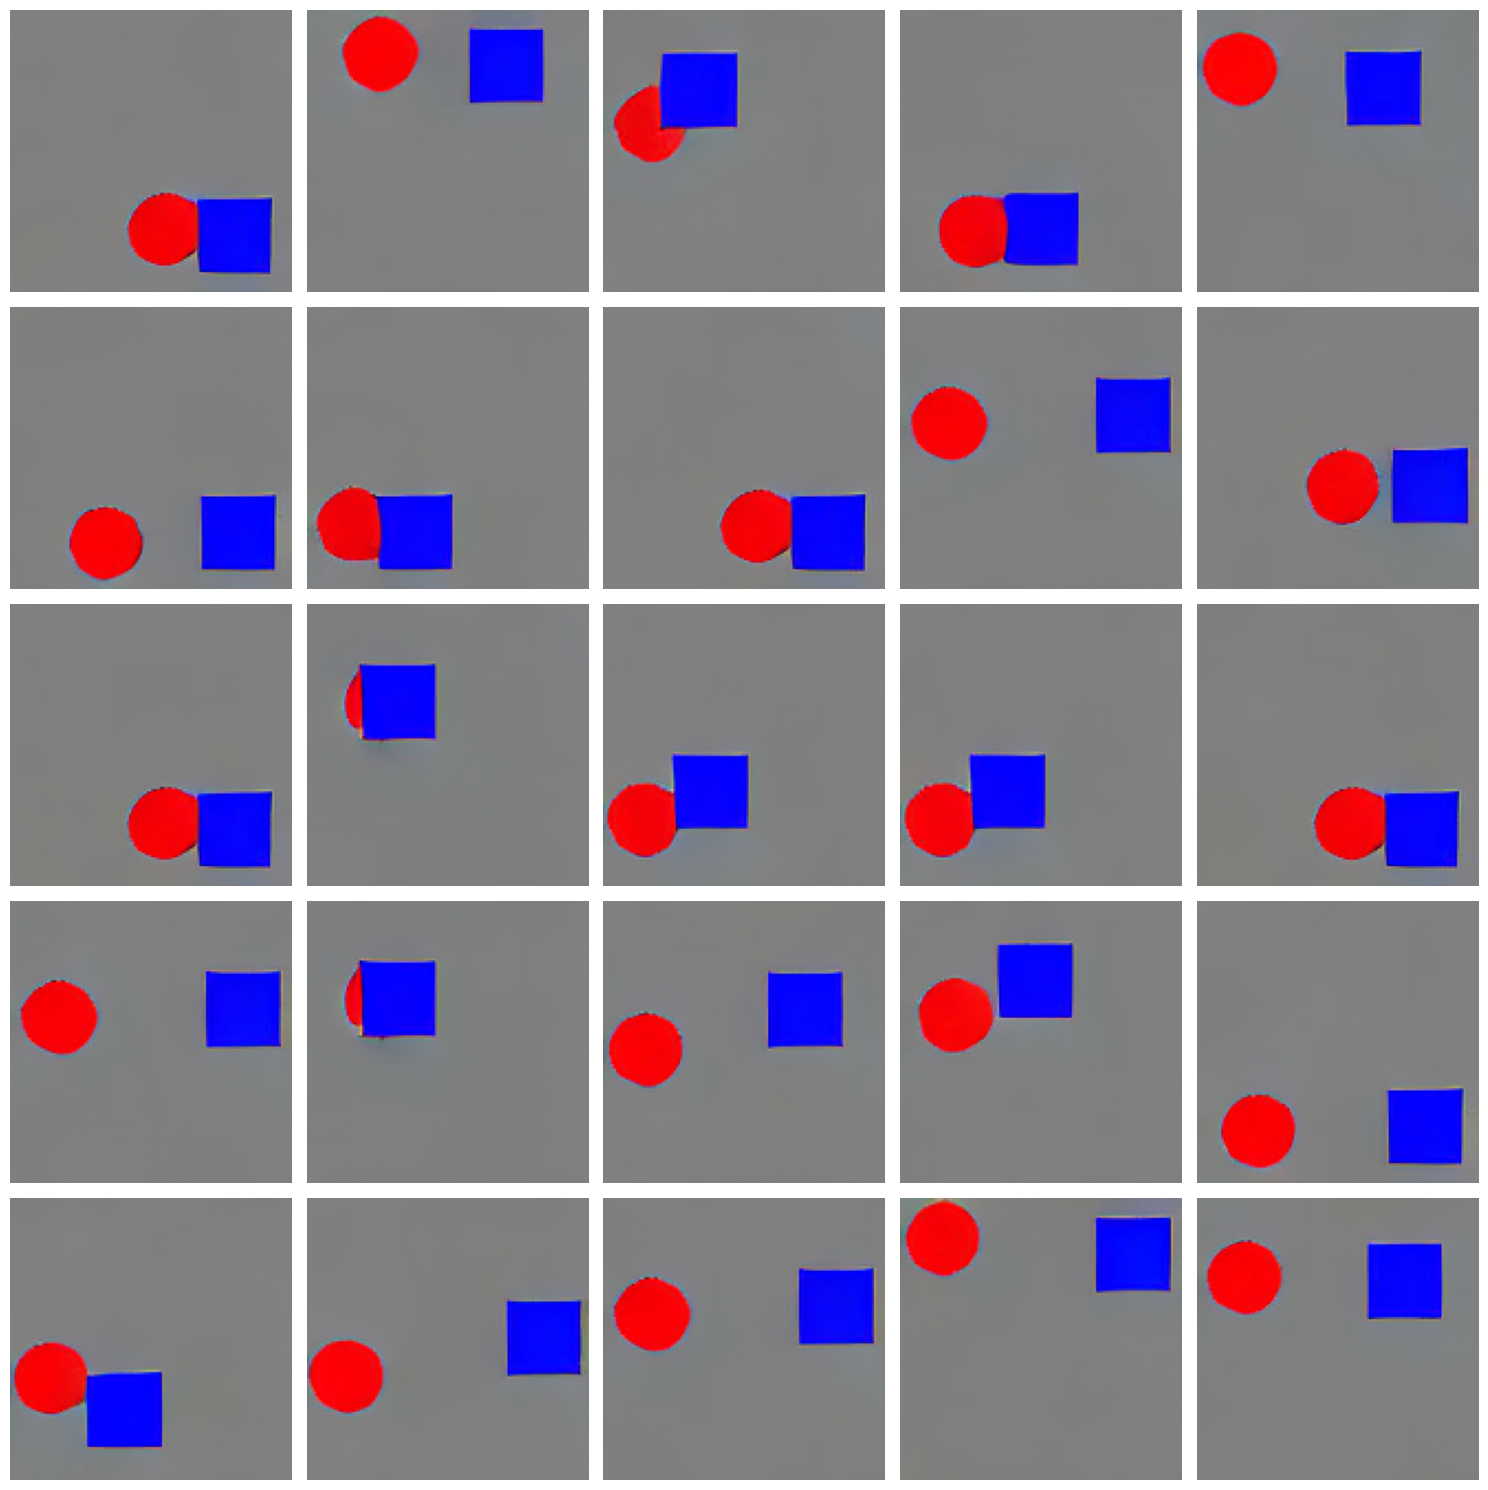

In [64]:
import matplotlib.pyplot as plt

# Create a 5x5 grid of subplots
fig, axes = plt.subplots(5, 5, figsize=(15, 15))

# Flatten the 2D array of axes for easier indexing
axes_flat = axes.flatten()

# Plot each image in the grid
for i in range(25):
    axes_flat[i].imshow(image_logs['images'][i])
    axes_flat[i].axis('off')  # Turn off axis labels

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

#image_logs['images'][1]

In [76]:
image_logs, latents_traj, pred_traj, t_traj = visualize_prompt_with_traj(pipeline, prompt, prompt_cache_dir, config.model_max_length, weight_dtype, inference_step_star=0, manipulated_mask_func=mask_all_attention)

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
       device='cuda:0')
torch.Size([50, 20, 4096])
torch.Size([50, 20])
Step 0: Using POST prompt_attention_mask shape: torch.Size([50, 20])
tensor([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 

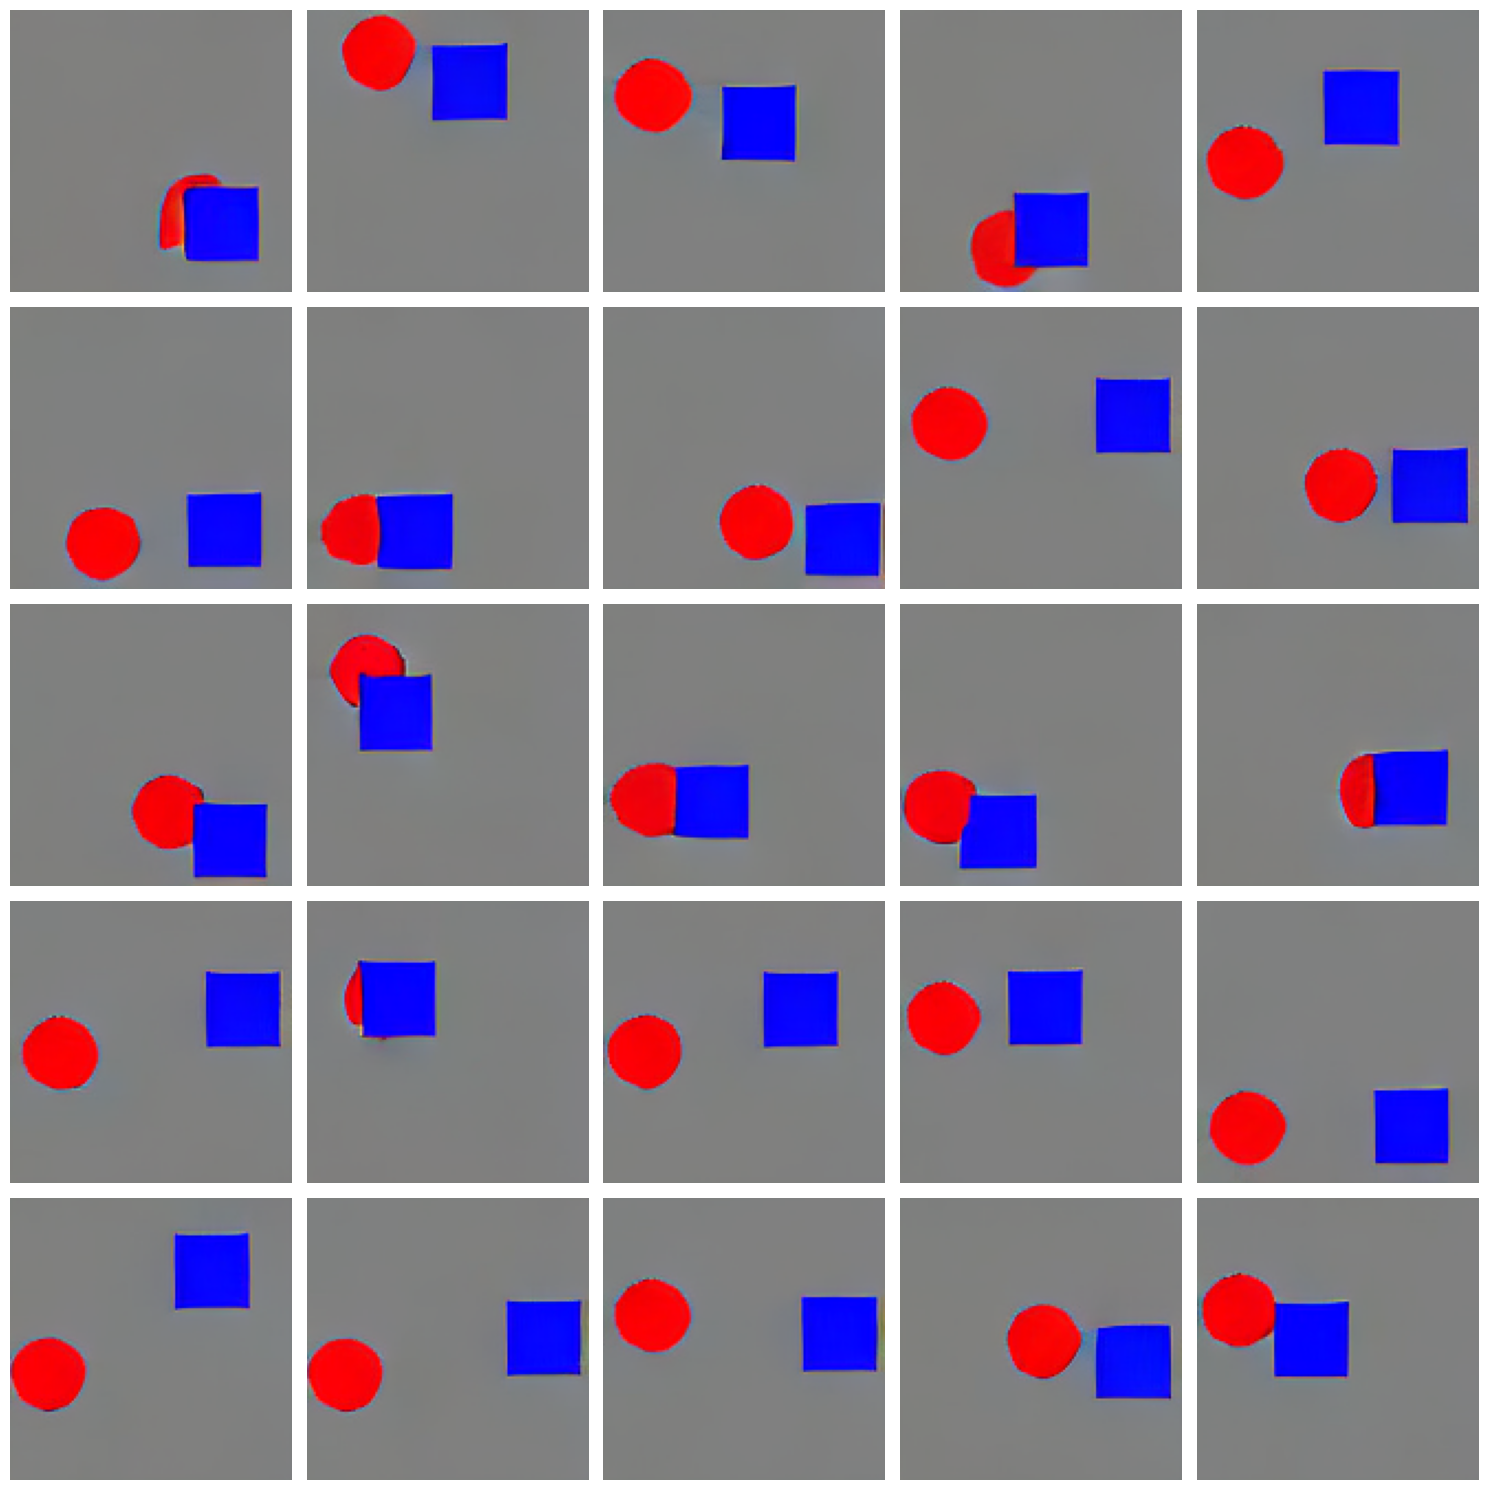

In [77]:
import matplotlib.pyplot as plt

# Create a 5x5 grid of subplots
fig, axes = plt.subplots(5, 5, figsize=(15, 15))

# Flatten the 2D array of axes for easier indexing
axes_flat = axes.flatten()

# Plot each image in the grid
for i in range(25):
    axes_flat[i].imshow(image_logs['images'][i])
    axes_flat[i].axis('off')  # Turn off axis labels

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

#image_logs['images'][1]

In [70]:
# evaluate
# detect where is the objects

# Re-import necessary libraries
import cv2
import numpy as np
import pandas as pd
from PIL import Image

def find_classify_objects(image, area_threshold=100, radius=16.0):
    """Find and classify objects in an image based on shape and color.

    Args:
        image (PIL.Image or numpy.ndarray): Input image to analyze. Can be either a PIL Image or numpy array.
        area_threshold (int, optional): Minimum contour area to consider as an object. Defaults to 100.
        radius (float, optional): Expected radius of objects for area comparison. Defaults to 16.0.

    Returns:
        list: List of dictionaries containing detected object properties:
            - Object (int): Object index
            - Shape (str): Classified shape ("Triangle", "Square", "Rectangle", "Circle" or "Unknown")
            - Color (RGB) (tuple): Mean RGB color values of the object
            - Center (x, y) (tuple): Center coordinates of the object
            - Area (float): Actual contour area
            - Expected Area (float): Theoretical area based on shape and radius
    """
    if isinstance(image, Image.Image):
        image = np.array(image)
    # gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    classified_objects = []
    # go through each color channel
    for channel in range(3):
        gray_image = image[:,:,channel]
        # Threshold the image to create a binary mask
        _, binary_mask = cv2.threshold(gray_image, 180, 255, cv2.THRESH_BINARY)
        # Find contours of the shapes
        contours, _ = cv2.findContours(binary_mask, 
                                    cv2.RETR_EXTERNAL, 
                                    cv2.CHAIN_APPROX_SIMPLE)
        # Initialize results
        for i, contour in enumerate(contours):
            # Calculate properties of the contour
            approx = cv2.approxPolyDP(contour, 0.04 * cv2.arcLength(contour, True), True)
            area = cv2.contourArea(contour)
            x, y, w, h = cv2.boundingRect(contour)
            # Shape classification based on the number of vertices
            if len(approx) == 3:
                shape = "Triangle"
                s = radius * 2  # Side length
                h = s * (3 ** 0.5) / 2  # Height of the equilateral triangle
                expected_area = s * h / 2
            elif len(approx) == 4:
                shape = "Square" if abs(w - h) < 5 else "Rectangle"
                s = radius * 2
                expected_area = s**2
            elif len(approx) > 4:
                shape = "Circle"
                expected_area = np.pi * radius ** 2
            else:
                shape = "Unknown"
                expected_area = np.nan
            # Calculate the color of the shape by extracting the region
            mask = np.zeros_like(gray_image)
            cv2.drawContours(mask, [contour], -1, 255, -1)
            mean_color = cv2.mean(image, mask=mask)
            # Add to results
            if area < area_threshold:
                continue
            classified_objects.append({
                "Object": i + 1,
                "Shape": shape,
                "Color (RGB)": tuple(map(int, mean_color[:3])),
                "Center (x, y)": (x + w // 2, y + h // 2),
                "Area": area,
                "Expected Area": expected_area
            })

    # Convert to DataFrame for better visualization
    classified_objects_df = pd.DataFrame(classified_objects)
    classified_objects_df
    return classified_objects_df
# Display the classification results to the user
# import ace_tools as tools; tools.display_dataframe_to_user(name="Shape and Color Classification Results", dataframe=classified_objects_df)


In [71]:
find_classify_objects(image_logs['images'][0], area_threshold=100, radius=16.0)

,Object,Shape,Color (RGB),"Center (x, y)",Area,Expected Area
0,2,Circle,"(242, 4, 9)","(69, 99)",778.0,804.247719
1,3,Rectangle,"(8, 5, 248)","(99, 101)",1024.0,1024.000000
